In [4]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import re
import string
import difflib
from collections import Counter
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
import warnings   

In [10]:
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas", lineno=570)

In [6]:
match_pattern = re.findall(r'\b[a-z]{5,15}\b', open('A:\\Data Analysis Jupyter\\Speech-Analysis\\modibihar.txt').read().lower())

In [7]:
match_count = Counter(match_pattern).most_common(5)

In [8]:
match_count

[('their', 25),
 ('people', 23),
 ('government', 17),
 ('sisters', 14),
 ('these', 14)]

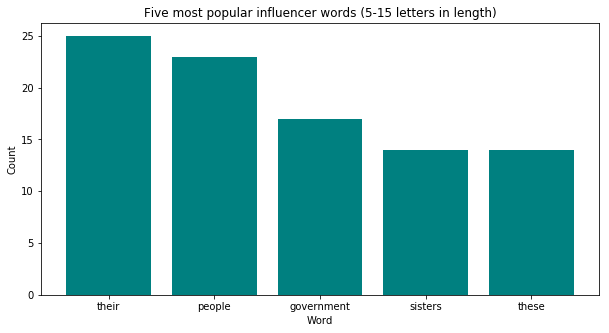

In [11]:
# sort in-place from highest to lowest
match_count.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*match_count))[0]
score = list(zip(*match_count))[1]
x_pos = np.arange(len(people)) 

plt.bar(x_pos, score, align='center', color='teal')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.xticks(x_pos, people) 
plt.title("Five most popular influencer words (5-15 letters in length)")
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [12]:
modi_text = open("modibihar.txt").read().lower()
modi_sentences = sent_tokenize(modi_text)
modi_sent_clean = [x for x in modi_sentences if not any(c.isdigit() for c in x)]

In [15]:
testimonial = TextBlob(modi_text)

In [16]:
testimonial.sentiment

Sentiment(polarity=0.06864191364191362, subjectivity=0.4965171287046287)

In [17]:
Counter(testimonial.noun_phrases).most_common(5)

[('bharat mata', 9),
 ('strong government', 7),
 ('dear friends', 5),
 ('black money', 5),
 ('form house', 5)]

In [18]:
terror_match = difflib.get_close_matches('islamic terrorism', modi_sent_clean, n = 15, cutoff = 0.2)
terror_match

['i am very grateful to him too.',
 'there is no terror threat from india, not just terrorism.',
 'bail is transported.',
 'brothers, tell me, you tell me, who can eliminate this terrorism?',
 "because no other group's right was seized.",
 'we are also going to make arrangements for this.',
 'village-village has taken to the poor house.',
 'my mother is blessing me from there.',
 'who has seen this power by taking the biggest blow to terrorism and naxalism?',
 'they will have to return one lump of the poor.',
 'they will have to return one lump of the poor.',
 'they will have to return one lump of the poor.',
 'they will have to return one lump of the poor.',
 'they will have to return one lump of the poor.',
 'we are three in one.']

In [21]:
farmer_match = difflib.get_close_matches('farmers', modi_sent_clean, n = 15, cutoff = 0.2)
farmer_match

['all farmers will get the benefit of it.',
 'we are three in one.',
 'have given.',
 'have given.',
 'i am very grateful to him too.',
 'their government starts to run.',
 'once again the modi government.',
 'friends, be our small farmer, farm laborer, small shopkeeper.',
 'who has seen?']